In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings  

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
def plot_svm(clf, X, y, title=None):
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='bwr')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    plt.title(title, fontdict = {'fontsize' : 16})    
    plt.show()
    

In [3]:
def read_data(filename):
    encoder = LabelEncoder()
    encoder.fit(['P', 'N'])
    
    data = pd.read_csv(filename)
    X = data.drop('class', axis=1).to_numpy(dtype='float64')
    y = data['class'].to_numpy()
    y = encoder.transform(y)
    
    return X, y

In [4]:
def report(params, dataset, title=None):
    grid_cv = GridSearchCV(
        SVC(),
        params,
        n_jobs=-1,
        scoring=scorer,
        cv=LeaveOneOut()
    )
    X, y = dataset
    grid_cv.fit(X, y)
    print(f'Best hyperparameters for {title}:')
    print(grid_cv.best_params_)
    print('F1-score:', grid_cv.best_score_)
    plot_svm(grid_cv.best_estimator_, X, y, title)

scorer = make_scorer(f1_score, average='macro')

In [5]:
chips = read_data('chips.csv')
geyser = read_data('geyser.csv')

## 1. Линейное ядро

Best hyperparameters for Chips (linear kernel):
{'C': 1.0, 'kernel': 'linear'}
F1-score: 0.5
CPU times: user 1.26 s, sys: 507 ms, total: 1.77 s
Wall time: 1.79 s
Best hyperparameters for Geyser (linear kernel):
{'C': 0.2, 'kernel': 'linear'}
F1-score: 0.9054054054054054
CPU times: user 1.52 s, sys: 121 ms, total: 1.64 s
Wall time: 3 s


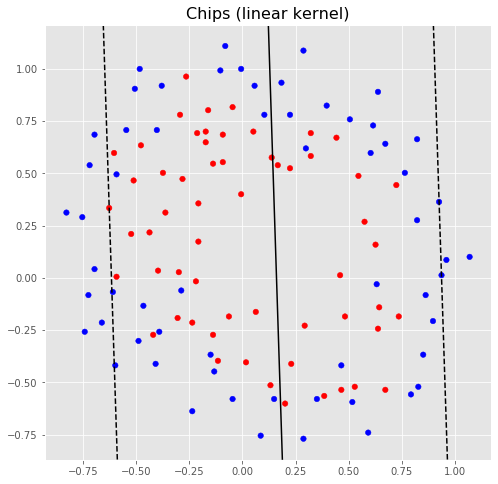

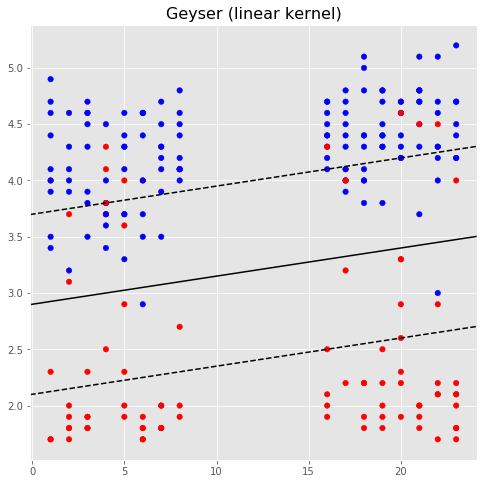

In [6]:
grid_param = {
    "C": np.arange(0, 5, 0.2),
    "kernel": ["linear"]
}

%time report(grid_param, chips, 'Chips (linear kernel)')
%time report(grid_param, geyser, 'Geyser (linear kernel)')

## 2. Полиноминальное ядро

Best hyperparameters for Chips (polynomial kernel):
{'C': 0.4, 'coef0': 0.3999999999999998, 'degree': 2, 'kernel': 'poly'}
F1-score: 0.8305084745762712
CPU times: user 27.8 s, sys: 297 ms, total: 28.1 s
Wall time: 34 s
Best hyperparameters for Geyser (polynomial kernel):
{'C': 1.2000000000000002, 'coef0': 0.19999999999999984, 'degree': 2, 'kernel': 'poly'}
F1-score: 0.9099099099099099
CPU times: user 58.2 s, sys: 449 ms, total: 58.6 s
Wall time: 1min 40s


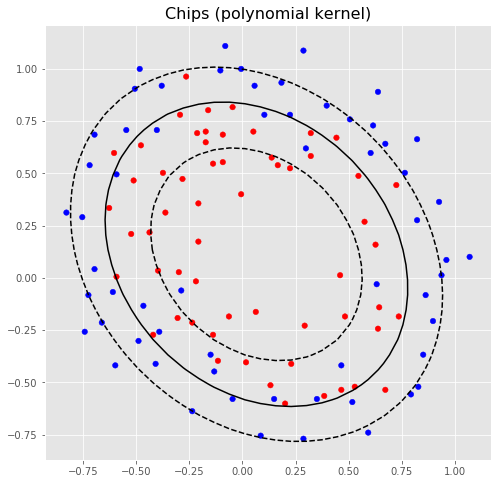

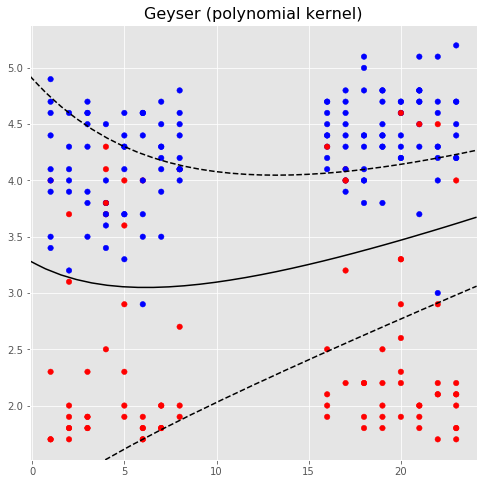

In [7]:
grid_param = {
    "C": np.arange(0, 5, 0.2),
    "kernel": ["poly"],
    "degree": np.arange(1, 5),
    "coef0": np.arange(-0.5, 0.5, 0.1)
}

%time report(grid_param, chips, 'Chips (polynomial kernel)')
%time report(grid_param, geyser, 'Geyser (polynomial kernel)')

### 3. Ядро RBF (радиально-базисная функция)

Best hyperparameters for Chips (RBF kernel):
{'C': 4.6000000000000005, 'kernel': 'rbf'}
F1-score: 0.8389830508474576
CPU times: user 1.05 s, sys: 96.7 ms, total: 1.14 s
Wall time: 1.2 s
Best hyperparameters for Geyser (RBF kernel):
{'C': 1.4000000000000001, 'kernel': 'rbf'}
F1-score: 0.8963963963963963
CPU times: user 1.68 s, sys: 144 ms, total: 1.83 s
Wall time: 2.62 s


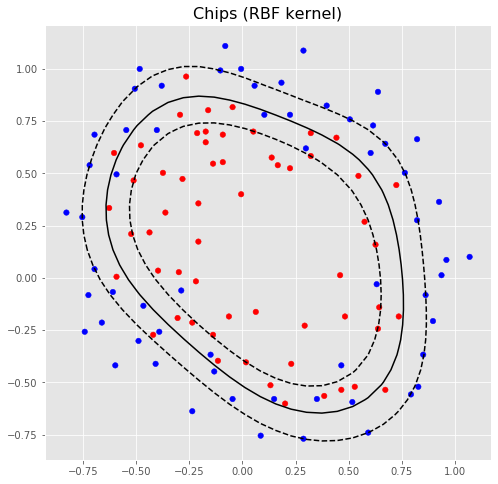

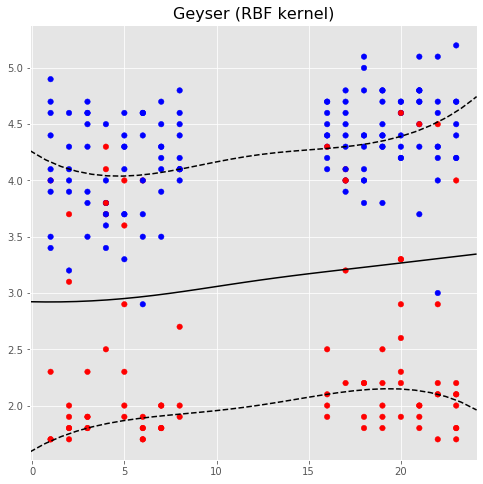

In [8]:
grid_param = {
    "C": np.arange(0, 5, 0.2),
    "kernel": ["rbf"]
}

%time report(grid_param, chips, 'Chips (RBF kernel)')
%time report(grid_param, geyser, 'Geyser (RBF kernel)')

### 4. Ядро-сигмоида

Best hyperparameters for Chips (sigmoid kernel):
{'C': 1.2000000000000002, 'coef0': 0.7999999999999996, 'kernel': 'sigmoid'}
F1-score: 0.7627118644067796
CPU times: user 7.69 s, sys: 190 ms, total: 7.88 s
Wall time: 10.4 s
Best hyperparameters for Geyser (sigmoid kernel):
{'C': 0.4, 'coef0': 0.7999999999999996, 'kernel': 'sigmoid'}
F1-score: 0.6351351351351351
CPU times: user 13.6 s, sys: 159 ms, total: 13.8 s
Wall time: 25.6 s


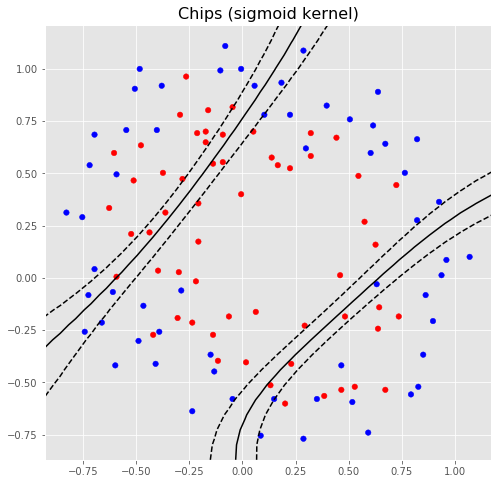

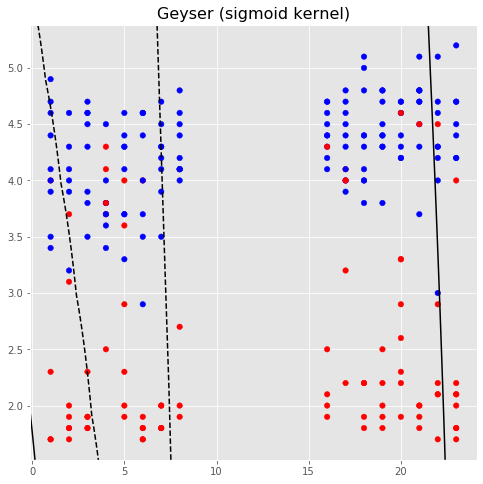

In [9]:
grid_param = {
    "C": np.arange(0, 5, 0.2),
    "kernel": ["sigmoid"],
    "coef0": np.arange(-1, 1, 0.2),
}

%time report(grid_param, chips, 'Chips (sigmoid kernel)')
%time report(grid_param, geyser, 'Geyser (sigmoid kernel)')